<a href="https://colab.research.google.com/github/maximdorogov/Practicos_Imagenes_UNS/blob/main/Linear_and_Morphological.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

#uploaded = files.upload()


In [2]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage  import color
import numpy as np
# to avoid cv2.imshow crash
from google.colab.patches import cv2_imshow

Lets import a image and transform it into binary

Text(0.5, 1.0, 'Binary Image')

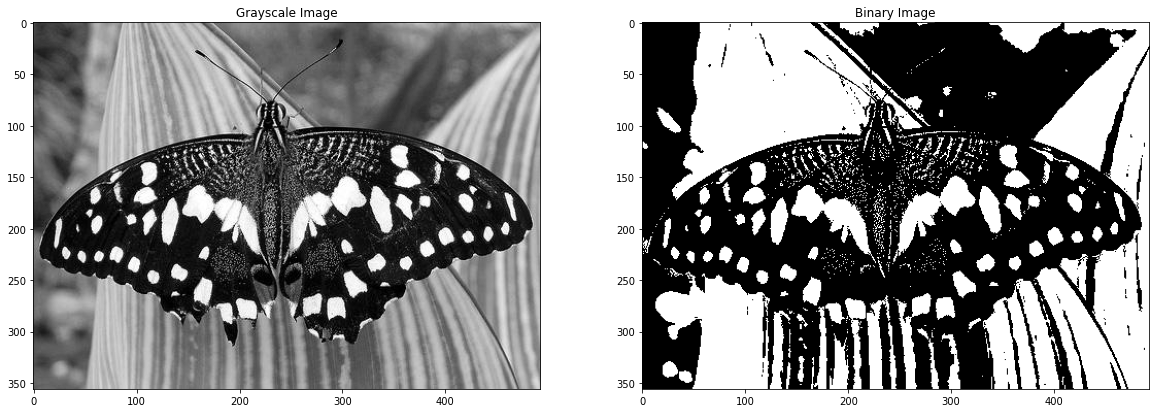

In [3]:
# OpenCV samples: https://github.com/opencv/opencv/tree/master/samples/data
# Morphological transformation
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

url = 'https://github.com/opencv/opencv/blob/master/samples/data/butterfly.jpg'

img = cv.imread('/content/drive/My Drive/GoogleCollab/Proc_Imagenes/butterfly.jpg', 0)

plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')

# lets transform the image into binary

ret, img_bin = cv.threshold(img,127,255,cv.THRESH_BINARY)

plt.subplot(1, 2, 2)
plt.imshow(img_bin, cmap='gray')
plt.title('Binary Image')

Lets try some filtering

Text(0.5, 1.0, 'Gaussian 5x5 filter')

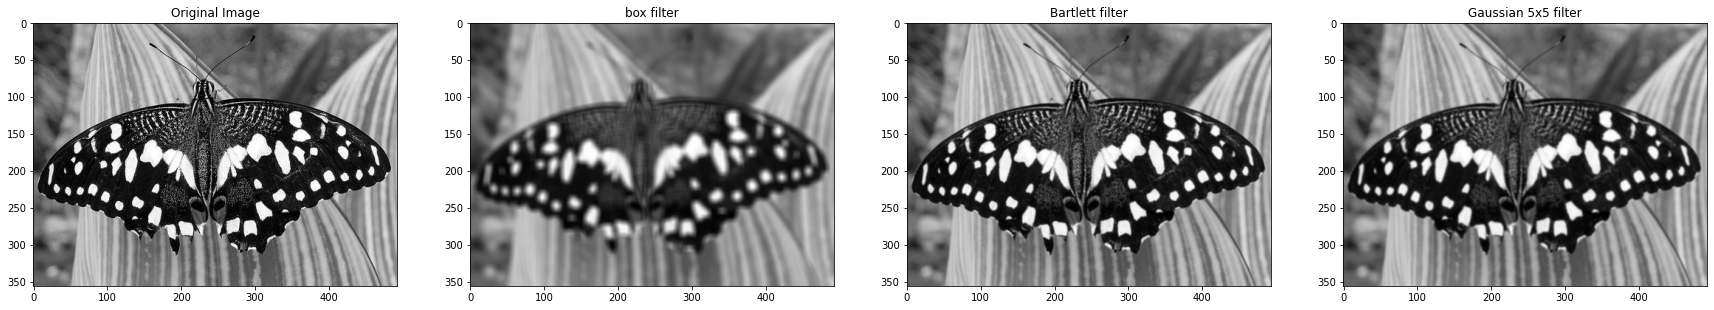

In [4]:
# Defining the Kernels

box = np.ones((9, 9)) * 1/81

# bartlett 3x3 filter
barttlet = np.outer(np.array([1, 2, 1]), np.array([1, 2, 1])) / 16

#gaussian 5x5
gauss = np.outer(np.array([1, 4, 6, 4, 1]), np.array([1, 4, 6, 4, 1]))
gauss = gauss/np.sum(gauss)

img_box      = cv.filter2D(img, -1,  box, cv.BORDER_DEFAULT)
img_barttlet = cv.filter2D(img, -1,  barttlet, cv.BORDER_DEFAULT)
img_gaussian = cv.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(30,30))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(img_box, cmap='gray')
plt.title('box filter')

plt.subplot(1, 4, 3)
plt.imshow(img_barttlet, cmap='gray')
plt.title('Bartlett filter')

plt.subplot(1, 4, 4)
plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian 5x5 filter')

Laplacian filtering

Text(0.5, 1.0, 'without pre-filter, kernel size = 1 (4 neighbours)')

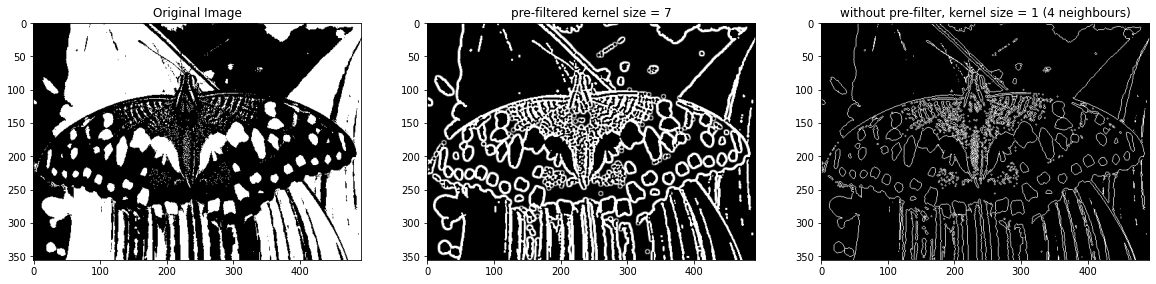

In [5]:
# Laplacian filtering the binary image

img = img_bin

kernel_size = 5

pre_filtered	=	cv.Laplacian(cv.GaussianBlur(img,(5,5),0), -1, ksize=kernel_size)

plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(pre_filtered, cmap='gray')
plt.title('pre-filtered kernel size = 7')

dst	=	cv.Laplacian(	img, -1, ksize=1)

plt.subplot(1, 3, 3)
plt.imshow(dst, cmap='gray')
plt.title('without pre-filter, kernel size = 1 (4 neighbours)')




Morphological Processing: Erode and dilate

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Text(0.5, 1.0, 'Dilated')

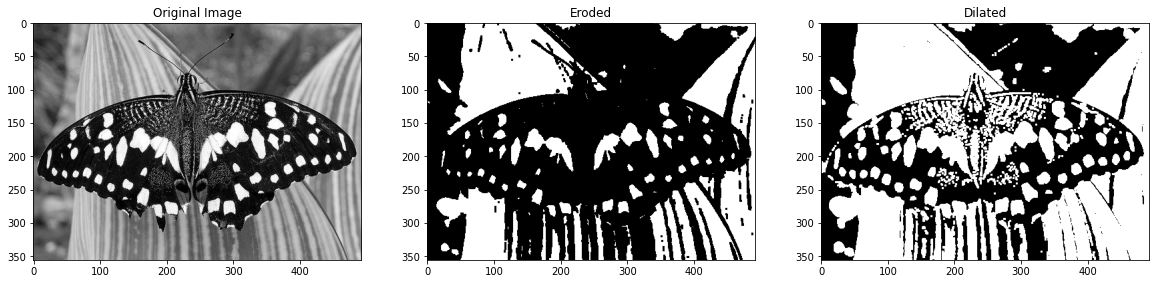

In [6]:
 # https://docs.opencv.org/master/d4/d76/tutorial_js_morphological_ops.html
 
 '''
erosion_type = cv.MORPH_RECT
erosion_type = cv.MORPH_CROSS
erosion_type = cv.MORPH_ELLIPSE
 '''   
erosion_type = cv.MORPH_RECT

# define my structuring element

selement = cv.getStructuringElement(erosion_type, (3, 3))
print(selement)

img = cv.imread('/content/drive/My Drive/GoogleCollab/Proc_Imagenes/butterfly.jpg', 0)

# lets transform the image into binary
ret, img_bin = cv.threshold(img,127,255, cv.THRESH_BINARY)

iter = 1

eroded_img = cv.erode(img_bin, selement, iter)
dilated_img = cv.dilate(img_bin, selement, iter)

plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded')

plt.subplot(1, 3, 3)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated')

Compound operations

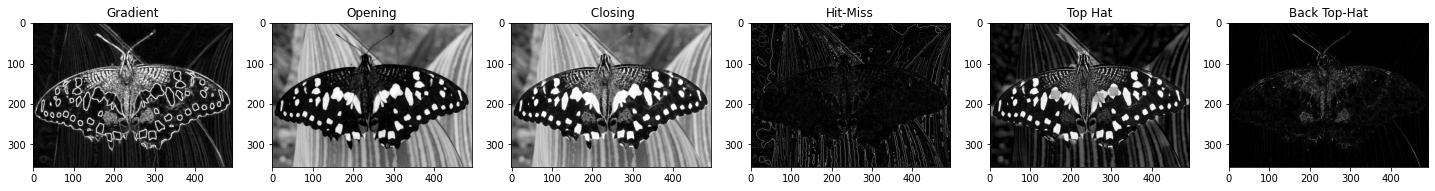

In [27]:
hitmiss_kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

img_grad = cv.morphologyEx(img, cv.MORPH_GRADIENT, selement, iterations = 1)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, selement)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, selement)
img_hitMiss = cv.morphologyEx(img, cv.MORPH_HITMISS, hitmiss_kernel)
imgTopHat = cv.morphologyEx(img, cv.MORPH_TOPHAT, selement, iterations = 10)
imgBlackHat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, selement)

titles = ['Gradient', 'Opening', ' Closing', 'Hit-Miss', 'Top Hat', 'Back Top-Hat']
list_of_images = [img_grad, opening, closing, img_hitMiss, imgTopHat, imgBlackHat ]



i = 1
plt.figure(figsize=(25,25))
for image, title in zip(list_of_images, titles):
  
  plt.subplot(1, len(list_of_images), i)
  plt.imshow(image, cmap='gray')
  plt.title(title)
  i = i + 1

Text(0.5, 1.0, 'Gradient')

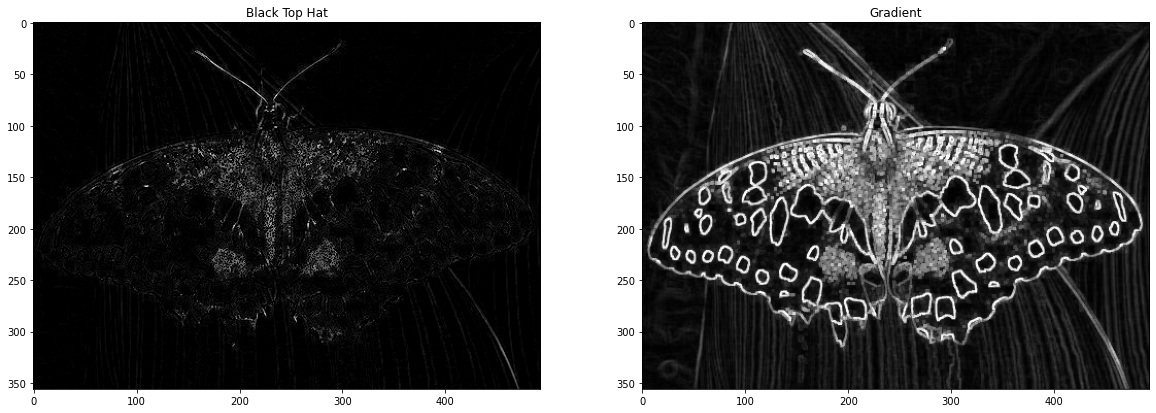

In [28]:
  plt.figure(figsize=(20,20))

  plt.subplot(1, 2, 1)
  plt.imshow(imgBlackHat, cmap='gray')
  plt.title("Black Top Hat")

  plt.subplot(1, 2, 2)
  plt.imshow(img_grad, cmap='gray')
  plt.title("Gradient")

Now lets erode and dilate a grayscale image

Text(0.5, 1.0, 'Dilated grayscale')

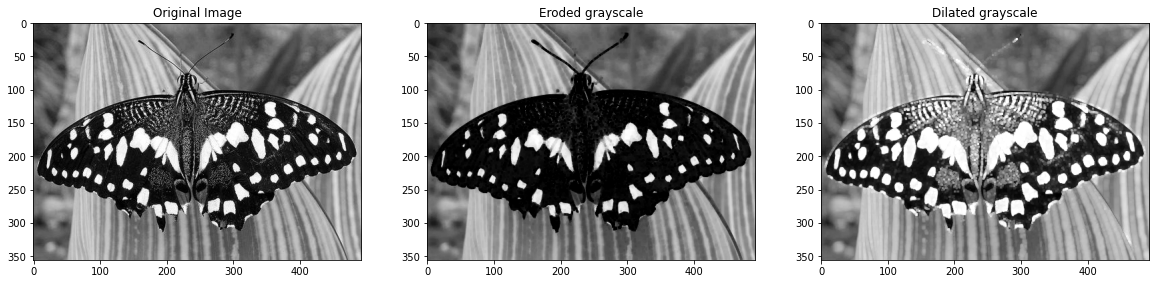

In [8]:
erosion_type = cv.MORPH_RECT
selement = cv.getStructuringElement(erosion_type, (3, 3))

eroded_img = cv.erode(img, selement, iter)
dilated_img = cv.dilate(img, selement, iter)

plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded grayscale')

plt.subplot(1, 3, 3)
plt.imshow(dilated_img, cmap='gray')
plt.title('Dilated grayscale')

Text(0.5, 1.0, 'Laplacian2eroded')

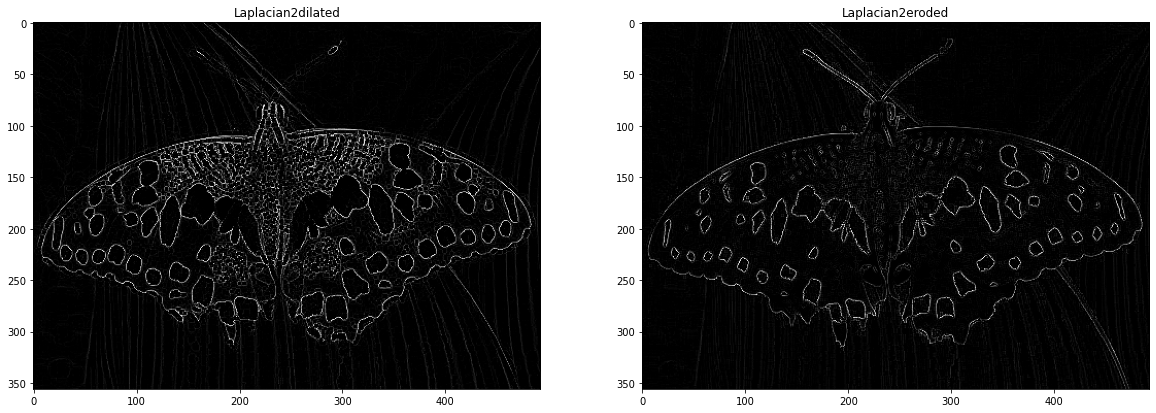

In [9]:
laplac_dilated	=	cv.Laplacian(	dilated_img, -1, ksize=1)
laplac_eroded	  =	cv.Laplacian( eroded_img, -1, ksize=1)

plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(laplac_dilated, cmap='gray')
plt.title('Laplacian2dilated')

plt.subplot(1, 2, 2)
plt.imshow(laplac_eroded, cmap='gray')
plt.title('Laplacian2eroded')

Watershed Algorithm (to do)

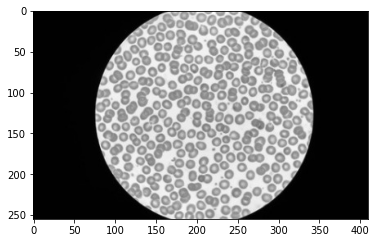

In [29]:
# https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html

globulos = cv.imread('/content/drive/My Drive/GoogleCollab/Proc_Imagenes/globulos.jpeg', 0)
plt.imshow(globulos, cmap='gray')